<a href="https://colab.research.google.com/github/Utomi-Tom/Heart-Disease-Project/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease using ML

This notebook looks into various python based machine learning and datascience libraries in an attempt to build a machine learning model which capable of predicting if a person has heart disease based on several medical attributes. 

We are going to use the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

***Problem Definition***
In a statement, 
> Given clinical parameters about a patient. Can we predict whether or not they have heart disease?

***Data***

A short introduction about data is good. 
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. 

source: https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv

# Create a data dictionary. this defines the properties and labels of the dataset.
ageage in years

sex(1 = male; 0 = female)

cpchest pain type

trestbpsresting blood pressure (in mm Hg on admission to the hospital)

cholserum cholestoral in mg/dl

fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecgresting electrocardiographic results

thalachmaximum heart rate achieved

exangexercise induced angina (1 = yes; 0 = no)

oldpeakST depression induced by exercise relative to rest

slopethe slope of the peak exercise ST segment

canumber of major vessels (0-3) colored by flourosopy

thal3 = normal; 6 = fixed defect; 7 = reversable defect

target1 or 0


## 3. Evaluation 
> if we can reach 95% accuracy in predicting whether or not if a patient has heart disease

## 4. Features
This gives details about the features of the data.  

In [ ]:
# Setting up the tools for analysis

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics

## Load Data

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data Exploration

***Exploratory Data Analysis (EDA)***

The goal here is to become a subject matter expert and find out information about the dataset. 

1. What questions am I trying to solve?
2. what are the data  types and how do I treat them?
3. What is missing from the data and how do i deal with them?
4. where are the outliers and why should I care about them.
5. How can I manipulate the features to get more out of my data?



In [ ]:
# With this code I am trying to understand the nature of my target label. 

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

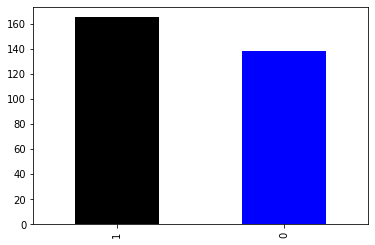

In [ ]:
# Visualise the distribution of heart disease
df["target"].value_counts().plot(kind ="bar", color = ["black", "blue"]);

In [ ]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Engineering
we compare different column and see how they influence the target column

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# compare target column with sex column
pd.crosstab (df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


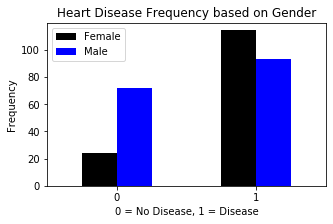

In [ ]:
# create a plot to visualize the above relationship
pd.crosstab(df.sex, df.target).plot(kind="bar",figsize= (5,3), color= ["black", "blue"] )
plt.title("Heart Disease Frequency based on Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

***compare the age, thalach and target columns**


In [ ]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

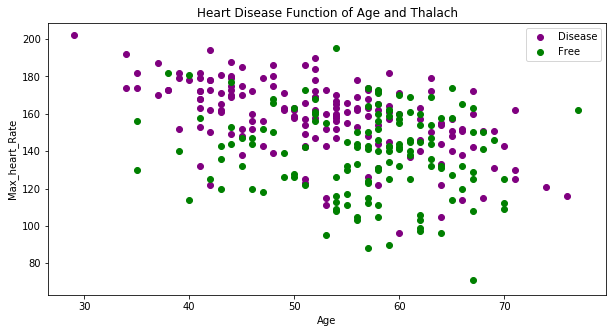

In [ ]:
# create a figure to display plots
plt.figure(figsize= (10,5))

# Scatter with positive samples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c= "purple")
# Scatter with negative samples
plt.scatter (df.age[df.target==0], df.thalach[df.target==0], c= "green");

plt.title("Heart Disease Function of Age and Thalach")
plt.xlabel("Age")
plt.ylabel("Max_heart_Rate")
plt.legend(["Disease", "Free"]);

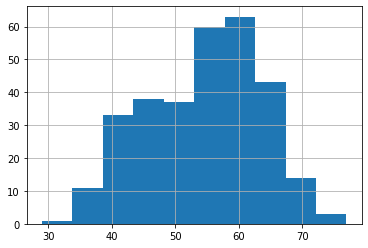

In [ ]:
# Consider the age distribution, the histogram will help correct for outliers in the dataset
df.age.hist();

***Compare target column with chest pain column***

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


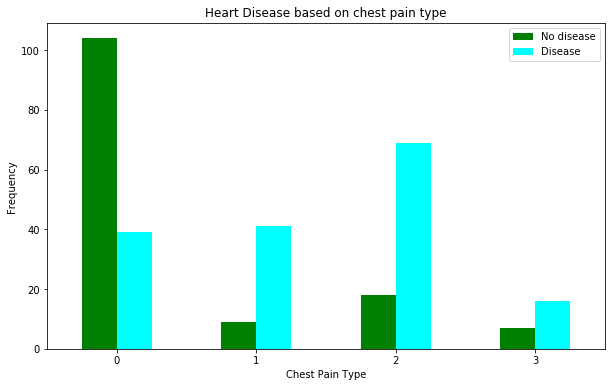

In [ ]:
# Visualize the above relation

pd.crosstab(df.cp, df.target).plot(kind="bar", figsize= (10,6), color= [ "green","cyan"] )

plt.title("Heart Disease based on chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No disease", "Disease"])
plt.xticks (rotation= 0);

In [ ]:
# Make a correlation matrix to see the relationship between the features if its positive or negative

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


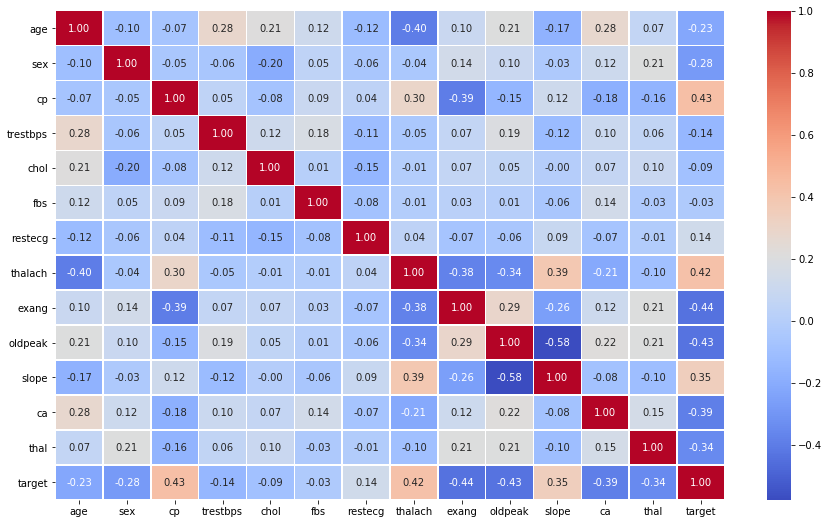

In [ ]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize= (15, 9))

ax = sns.heatmap (corr_matrix, annot= True, linewidth= 0.5, fmt = ".2f", cmap = "coolwarm")

## 5. Modelling

In [ ]:
# split data
M = df.drop("target", axis=1)
N = df["target"]

In [ ]:
np.random.seed(42)

M_tr,M_tt,N_tr,N_tt = train_test_split(M, N , test_size= 0.2)


Build a ML Model using:

1. RandomForestClassifier
2. K-NearestNeighbor
3. LogisticRegression

In [ ]:
# put models in a dictionary

models = {"Logistic Regression": LogisticRegression(max_iter = 1000),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

# create a function that would use the dictionary of models

def fit_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and Evaluates a ML models.
    
    """
    np.random.seed(42)
    # Make a dictionary to keep model scores
   
    model_score= {}
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append results to empty dict
        model_score[name]= model.score(X_test, y_test)
    return model_score


In [ ]:
my_score = fit_score(models,M_tr,M_tt,N_tr,N_tt )
my_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

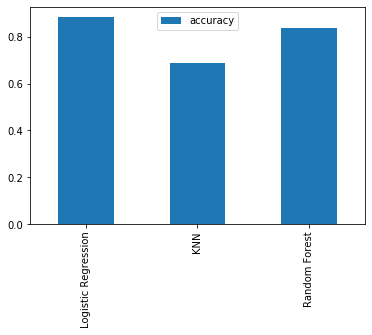

In [ ]:
# Model comparison
model_df = pd.DataFrame(my_score, index = ["accuracy"])
model_df.T.plot(kind= "bar");

Let us look at the following:
1. Hyperparameter tunning
2. Feature Importance
3. Confusion matrix
4. Cross validation 
5. Precision
6. Recall
7. F1 score 
8. Classsification Report
9. Roc curve
10. Area under curve (AUC)

# Hyperparameter tunniing 

There are several steps to take for hyperparameter tuning

1. By Hand
2. Using RandomizedSearchCV
3. Using GridSearchCv

**Tune KNN**


In [ ]:
train_scores = []
test_scores = []

# Create a list of different parameters for KNN

# Param --- n_neighors default is 5
n_n = np.arange(1,21)

# Setup Model
knn = KNeighborsClassifier()

## loop through the param
for i in n_n: 
    knn.set_params(n_neighbors= i)
    
    # fit the algorithm
    knn.fit(M_tr,N_tr)
    
    # update the training scores list
    train_scores.append(knn.score(M_tr,N_tr))
    
    # update the test_score list 
    test_scores.append(knn.score(M_tt,N_tt))
    


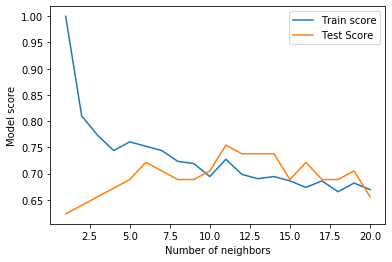

In [ ]:
plt.plot(n_n, train_scores , label = "Train score")
plt.plot(n_n, test_scores, label = "Test Score")
plt.xlabel( "Number of neighbors")
plt.ylabel("Model score")
plt.legend();

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune the following models using RandomizedSearchCv:

1. LogisticRegression 
2. RandomForestClassifier

In [ ]:
# Hyperparameter grid for LogisticRegression

log_reg_g = {"C": np.logspace(-4,4,20),
             "random_state":[200],
             "solver": ["liblinear"]}

rf_grid = {"n_estimators":np.arange(10,100,50), 
           "max_depth": [None, 3,5,10], 
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [ ]:
# Tune Logistic Regression

np.random.seed(42)

# setup the RanomizedSearchCV
Rs_logr = RandomizedSearchCV(LogisticRegression(), 
                            log_reg_g, cv =7, n_iter = 20,
                            verbose = True)

# Fit randomizedsearchcv tuned model to our training datasets
Rs_logr.fit(M_tr,N_tr)

# Score the model
Rs_logr.score(M_tt,N_tt)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


0.8852459016393442

In [ ]:
# RandomizedSearchCv for RandomForestClassifier

np.random.seed(42)

Rs_rs = RandomizedSearchCV(RandomForestClassifier(),
                          rf_grid, 
                          cv = 7, 
                          n_iter = 20,
                          verbose = True)
# Fit the tuned model 
Rs_rs.fit(M_tr,N_tr)

# Evaluate the Model
Rs_rs.score(M_tt,N_tt)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.9s finished


0.8524590163934426

In [ ]:
Rs_rs.best_params_


{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_depth': None}

# Hyperparameter tuning using GridSearchCV

This time we focus on the LogisticRegression model since it is the 
best model so far.


In [ ]:
# Grid for log_reg
log_reg_g = {"C": np.logspace(-4,4,30),
             "random_state":[250],
             "solver": ["liblinear"]}

# setup the gridsearchcv 

Gs_logr = GridSearchCV(LogisticRegression(),
                       log_reg_g, 
                       cv = 7, 
                       verbose = True)

# fit the tuned model
Gs_logr.fit(M_tr,N_tr)

# Evaluate the model
Gs_logr.score(M_tt,N_tt)

Fitting 7 folds for each of 30 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    1.1s finished


0.8852459016393442

In [ ]:
Gs_logr.best_params_

{'C': 0.20433597178569418, 'random_state': 250, 'solver': 'liblinear'}

# Evalutation of other classificatin metrics

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1_score

This involves making comparisons between predicted values from the trained ML and the True test labels which are expected. 


In [ ]:
# create y_preds
y_pred = Gs_logr.predict(M_tt)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

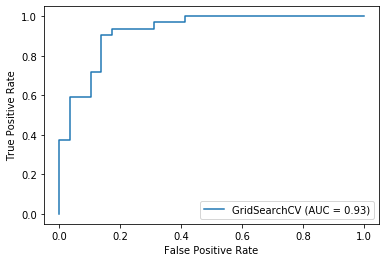

In [ ]:
# Plot ROC Curve and calculate  
plot_roc_curve(Gs_logr, M_tt,N_tt);

In [ ]:
# Confusion Matrix
coma = confusion_matrix(N_tt, y_pred)
coma

array([[25,  4],
       [ 3, 29]], dtype=int64)

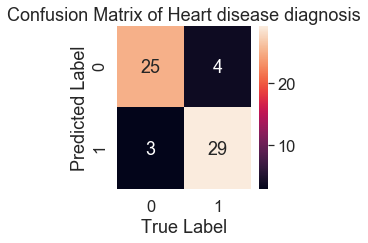

In [ ]:
sns.set(font_scale = 1.5)

def coma_plot (x, y):
    
    fig, ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(x,y),
     annot = True)
    plt.xlabel ("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix of Heart disease diagnosis")

coma_plot(N_tt, y_pred)

In [ ]:
# Classification Report
print(classification_report(N_tt, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross_validation

We are going to calculate precision, recall and F1 score of the model using 
cross-validation function

In [ ]:
# Check best Hyperparameters

Gs_logr.best_params_

{'C': 0.20433597178569418, 'random_state': 250, 'solver': 'liblinear'}

In [ ]:
# Create a new model with the best parameters

clf = LogisticRegression(C= 0.20433597178569418,random_state= 250,solver= 'liblinear')

# Cross-validation Accuracy
cv_ac =cross_val_score(clf, M, N, cv= 7, scoring = "accuracy" )
m_a_cv = np.mean(cv_ac)

In [ ]:
# Cross-validation Precision
cv_pr = cross_val_score(clf, 
                        M, N, 
                       cv = 7,
                        scoring = "precision")
m_p_cv = np.mean(cv_pr)

In [ ]:
# Cross-validated recall
cv_r = cross_val_score(clf, 
                        M, N, 
                       cv = 7,
                        scoring = "recall")
m_r_cv= np.mean(cv_r)

In [ ]:
# Cross-validate F1 score
cv_f1 = cross_val_score(clf, 
                        M, N, 
                       cv = 7,
                        scoring = "f1")
m_f_cv= np.mean(cv_f1)

In [ ]:
# Visualize all cross validated metrics

df_cv = pd.DataFrame({"Accuracy":m_a_cv,
                      "Precision":m_p_cv,
                      "Recall":m_r_cv,
                      "F1_Score":m_f_cv},index = [0] )
df_cv

,Accuracy,Precision,Recall,F1_Score
0,0.844986,0.815765,0.92676,0.867122


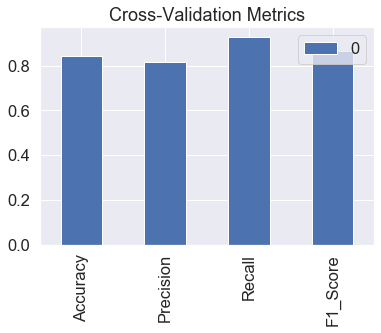

In [ ]:
df_cv.T.plot.bar(title = "Cross-Validation Metrics");

## Feature Importance

Feature importance is another way of asking which characteristics played important
roles in predicting the target.

Finding feature importance is different for each ML model.

In [ ]:
# Fit an instant of LogisticRegression
Gs_logr.best_params_

gld = LogisticRegression(C= 0.20433597178569418, random_state = 250, solver = 'liblinear')

gld.fit(M_tr, N_tr);


In [ ]:
# Check coef
gld.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [ ]:
# Match the coef_ of the features to their respective attribute columns

feat_dict= dict(zip(df.columns,list(gld.coef_[0])))
feat_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

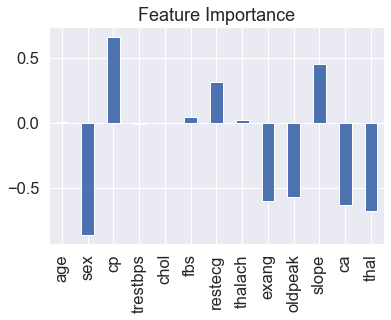

In [ ]:
# visuallize feature importance

feat_df = pd.DataFrame(feat_dict, index=[0])
feat_df.T.plot.bar(title= "Feature Importance", legend= False);

In [ ]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


## Experimentation

If you have not reached or beat the project evaluation metric yet ... ask yourself several...

* Could we collect more data?
* Could we try a better model? Like CatBoost or XGBoost?
* Could we improve the current model by tuning using more parameters

* But if on the contrary the evaluation was achieved then how do i export it and send to my boss?
